**Exercise 6.21**.  Simulate an MA(1) time series with $n = 60$ and with $\theta = 0.5$.

**(a)**  Calculate the theoretical autocorrelation at lag 1 for this model.

**(b)**  Calculate the sample autocorrelation at lag 1, and compare the value with its theoretical value. Use Exhibit 6.2 on page 112, to quantify the comparisons.

**(c)**  Repeat part (b) with a new simulation. Describe how the precision of the estimate varies with different samples selected under identical conditions.

**(d)**  If software permits, repeat the simulation of the series and calculation of $r_1$ many times and form the sampling distribution of $r_1$. Describe how the precision of the estimate varies with different samples selected under identical conditions. How well does the large-sample variance given in Exhibit 6.2 on page 112, approximate the variance in your sampling distribution?

**Solution**.

In [1]:
require(ggplot2)

Loading required package: ggplot2



In [2]:
set.seed(10)
Y = arima.sim(model=list(ma=-0.5), n=60)

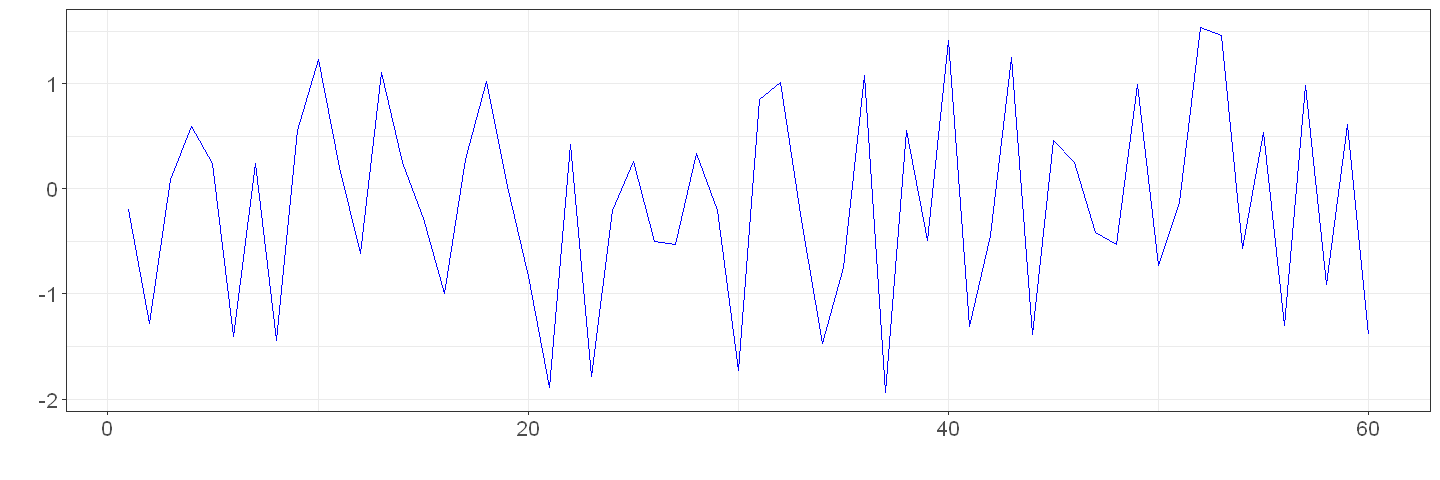

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:60, y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

**(a)**  The theoretical autocorrelation is $\rho_1 = -\theta / (1 + \theta^2) = -0.4$.

**(b)**


Autocorrelations of series 'Y', by lag

     0      1 
 1.000 -0.265 

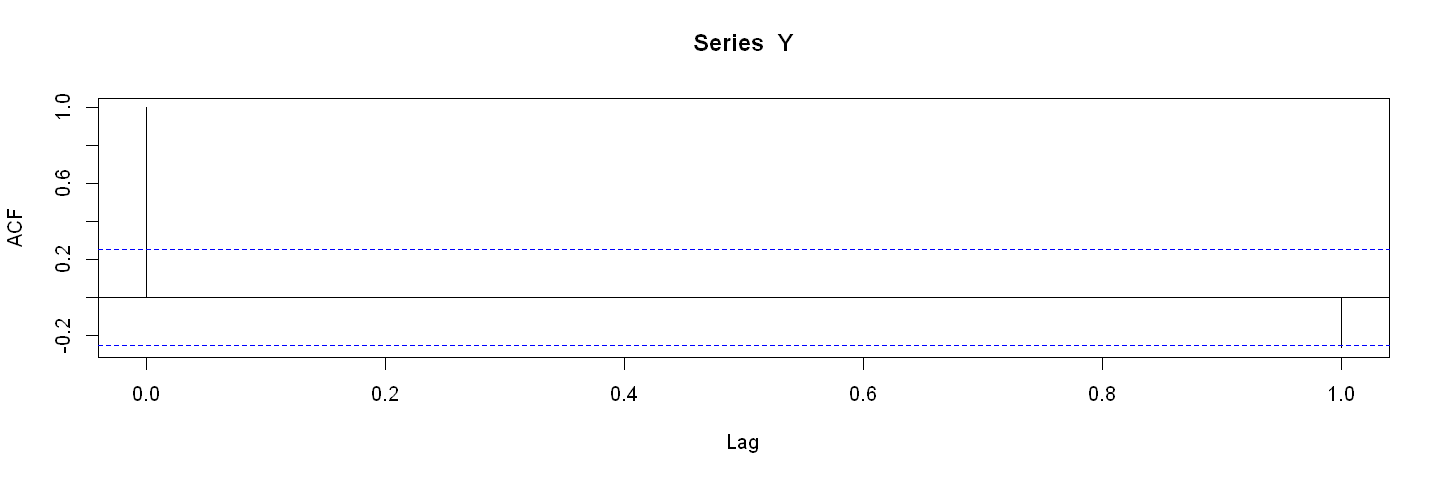

In [4]:
lags = acf(Y, lag.max=1)
lags

In [5]:
# Equation 6.1.9
se_ma1 <- function(theta, k, n) {
    rho = -theta / (1 + theta**2)
    if (k == 0) {
        sqrt((1 - 3 * rho**2 + 4 * rho**4)/n)
    } else {
        sqrt((1 + 2 * rho**2)/n)
    }
}

t1 = -0.5 / (1 + 0.5**2)
s1 = se_ma1(theta=0.5, k=1, n=60)

print(c('Standard deviation at lag 1: ', round(s1, digits=3)), quote=F)

r1 = lags$acf[2]

print(c('Standard deviation distance on lag 1 measurement: ', round(((r1 - t1) / s1), digits=2)), quote=F)

[1] Standard deviation at lag 1:  0.148                        
[1] Standard deviation distance on lag 1 measurement: 
[2] 0.91                                              


The sample autocorrelation is close to the theoretical value -- less than one standard deviation away.

**(c and d)**

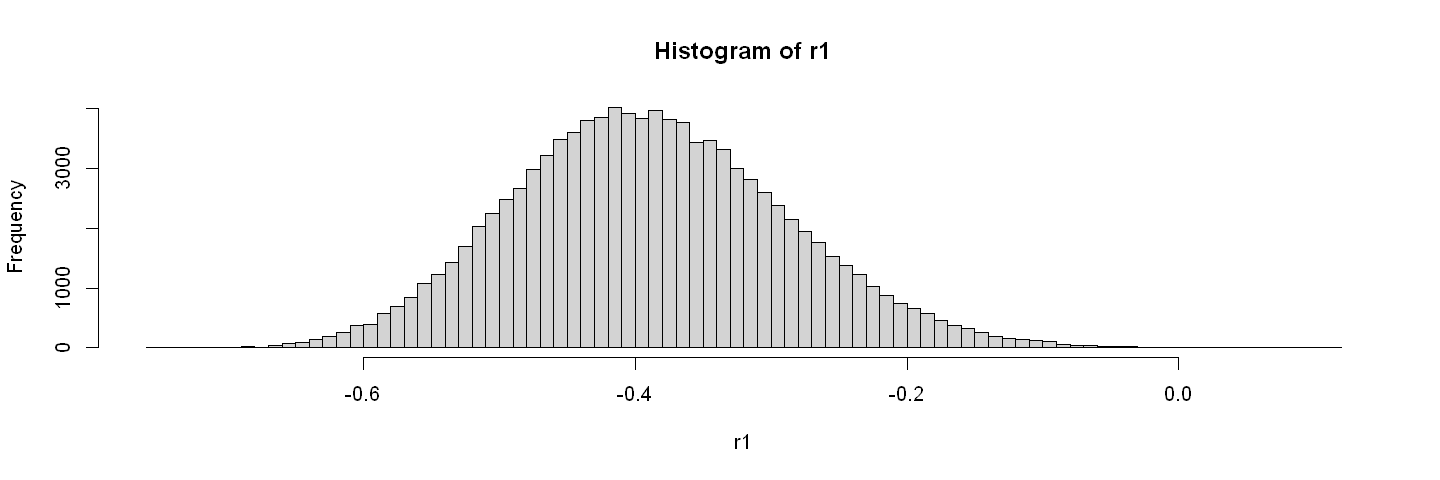

In [6]:
B = 100000
set.seed(0)
r1=rep(NA, B)

for (k in 1:B) {
    Yk = arima.sim(model=list(ma=-0.5), n=60)
    lags = acf(Yk, lag.max=1, plot=F)
    r1[k] = lags$acf[2]
}
hist(r1, breaks=100)

The histogram again approaches (though not exactly) the theoretical approximation for the sample autocorrelation.

**Exercise 6.22**.  Simulate an AR(1) time series with $n = 48$, with

**(a)** $\phi = 0.9$, and calculate the theoretical autocorrelations at lag 1 and lag 5;

**(b)** $\phi = 0.6$, and calculate the theoretical autocorrelations at lag 1 and lag 5;

**(c)** $\phi = 0.3$, and calculate the theoretical autocorrelations at lag 1 and lag 5.

**(d)**  For each of the series in parts (a), (b), and (c), calculate the sample autocorrelations at lag 1 and lag 5 and compare the values with their theoretical values.  Use Equations (6.1.5) and 6.1.6, page 111, to quantify the comparisons. In
general, describe how the precision of the estimate varies with the value of $\theta$.

**Solution**.

In [7]:
theoretical_acf_ar1 <- function(phi, k) { phi**k }

**(a)**

In [8]:
phi = 0.9
print(c('Theoretical ACF at lag 1: ', round(theoretical_acf_ar1(phi, 1), digits=5)), quote=F)
print(c('Theoretical ACF at lag 5: ', round(theoretical_acf_ar1(phi, 5), digits=5)), quote=F)

[1] Theoretical ACF at lag 1:  0.9                       
[1] Theoretical ACF at lag 5:  0.59049                   


**(b)**

In [9]:
phi = 0.6
print(c('Theoretical ACF at lag 1: ', round(theoretical_acf_ar1(phi, 1), digits=5)), quote=F)
print(c('Theoretical ACF at lag 5: ', round(theoretical_acf_ar1(phi, 5), digits=5)), quote=F)

[1] Theoretical ACF at lag 1:  0.6                       
[1] Theoretical ACF at lag 5:  0.07776                   


**(c)**

In [10]:
phi = 0.3
print(c('Theoretical ACF at lag 1: ', round(theoretical_acf_ar1(phi, 1), digits=5)), quote=F)
print(c('Theoretical ACF at lag 5: ', round(theoretical_acf_ar1(phi, 5), digits=5)), quote=F)

[1] Theoretical ACF at lag 1:  0.3                       
[1] Theoretical ACF at lag 5:  0.00243                   


**(d)**

In [11]:
# Equation 6.1.4
se_ar1 <- function(phi, k, n) {
    sqrt(((1 + phi**2) * (1 - phi**(2*k)) / (1 - phi**2) - 2 * k * phi**(2*k)) / n)
}

In [12]:
n = 48

In [13]:
phi = 0.9

set.seed(2020)
Y = arima.sim(model=list(ar=phi), n=n)
lags = acf(Y, lag.max=5, plot=F)

t1 = theoretical_acf_ar1(phi, 1)
t5 = theoretical_acf_ar1(phi, 5)

r1 = lags$acf[2]
r5 = lags$acf[6]

print(c('Sample autocorrelation at lag 1: ', round(r1, digits=5)), quote=F)
print(c('Sample autocorrelation at lag 5: ', round(r5, digits=5)), quote=F)

s1 = se_ar1(phi, 1, n)
s5 = se_ar1(phi, 5, n)

print(c('Standard deviation at lag 1: ', round(s1, digits=3)), quote=F)
print(c('Standard deviation at lag 5: ', round(s5, digits=3)), quote=F)

print(c('Standard deviation distance on lag 1 measurement: ', round(((r1 - t1) / s1), digits=2)), quote=F)
print(c('Standard deviation distance on lag 5 measurement: ', round(((r5 - t5) / s5), digits=2)), quote=F)

[1] Sample autocorrelation at lag 1:  0.7963                           
[1] Sample autocorrelation at lag 5:  0.14705                          
[1] Standard deviation at lag 1:  0.063                        
[1] Standard deviation at lag 5:  0.238                        
[1] Standard deviation distance on lag 1 measurement: 
[2] -1.65                                             
[1] Standard deviation distance on lag 5 measurement: 
[2] -1.86                                             


In [14]:
phi = 0.6

set.seed(2020)
Y = arima.sim(model=list(ar=phi), n=n)
lags = acf(Y, lag.max=5, plot=F)

t1 = theoretical_acf_ar1(phi, 1)
t5 = theoretical_acf_ar1(phi, 5)

r1 = lags$acf[2]
r5 = lags$acf[6]

print(c('Sample autocorrelation at lag 1: ', round(r1, digits=5)), quote=F)
print(c('Sample autocorrelation at lag 5: ', round(r5, digits=5)), quote=F)

s1 = se_ar1(phi, 1, n)
s5 = se_ar1(phi, 5, n)

print(c('Standard deviation at lag 1: ', round(s1, digits=3)), quote=F)
print(c('Standard deviation at lag 5: ', round(s5, digits=3)), quote=F)

print(c('Standard deviation distance on lag 1 measurement: ', round(((r1 - t1) / s1), digits=2)), quote=F)
print(c('Standard deviation distance on lag 5 measurement: ', round(((r5 - t5) / s5), digits=2)), quote=F)

[1] Sample autocorrelation at lag 1:  0.54208                          
[1] Sample autocorrelation at lag 5:  0.04593                          
[1] Standard deviation at lag 1:  0.115                        
[1] Standard deviation at lag 5:  0.207                        
[1] Standard deviation distance on lag 1 measurement: 
[2] -0.5                                              
[1] Standard deviation distance on lag 5 measurement: 
[2] -0.15                                             


In [15]:
phi = 0.3

set.seed(2020)
Y = arima.sim(model=list(ar=phi), n=n)
lags = acf(Y, lag.max=5, plot=F)

t1 = theoretical_acf_ar1(phi, 1)
t5 = theoretical_acf_ar1(phi, 5)

r1 = lags$acf[2]
r5 = lags$acf[6]

print(c('Sample autocorrelation at lag 1: ', round(r1, digits=5)), quote=F)
print(c('Sample autocorrelation at lag 5: ', round(r5, digits=5)), quote=F)

s1 = se_ar1(phi, 1, n)
s5 = se_ar1(phi, 5, n)

print(c('Standard deviation at lag 1: ', round(s1, digits=3)), quote=F)
print(c('Standard deviation at lag 5: ', round(s5, digits=3)), quote=F)

print(c('Standard deviation distance on lag 1 measurement: ', round(((r1 - t1) / s1), digits=2)), quote=F)
print(c('Standard deviation distance on lag 5 measurement: ', round(((r5 - t5) / s5), digits=2)), quote=F)

[1] Sample autocorrelation at lag 1:  0.35554                          
[1] Sample autocorrelation at lag 5:  0.01237                          
[1] Standard deviation at lag 1:  0.138                        
[1] Standard deviation at lag 5:  0.158                        
[1] Standard deviation distance on lag 1 measurement: 
[2] 0.4                                               
[1] Standard deviation distance on lag 5 measurement: 
[2] 0.06                                              


All sample correlations are within two standard deviations of the theoretical estimates.

**Exercise 6.23**.  Simulate an AR(1) time series with $\phi = 0.6$, with

**(a)** $n = 24$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$;

**(b)** $n = 60$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$;

**(c)** $n = 120$, and estimate $\rho_1 = \phi = 0.6$ with $r_1$.

**(d)** For each of the series in parts (a), (b), and (c), compare the estimated values with the theoretical value. Use Equation (6.1.5) on page 111, to quantify the comparisons. In general, describe how the precision of the estimate varies
with the sample size.

**Solution**.

**(a)**

In [16]:
n = 24
phi = 0.6

set.seed(2020)
r1 = acf(arima.sim(model=list(ar=phi), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] 0.487

**(b)**

In [17]:
n = 60
phi = 0.6

set.seed(2020)
r1 = acf(arima.sim(model=list(ar=phi), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] 0.508

**(c)**

In [18]:
n = 120
phi = 0.6

set.seed(2020)
r1 = acf(arima.sim(model=list(ar=phi), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] 0.562

**(d)** The theoretical value is $\rho_1 = \phi = 0.6$, with an estimated standard deviation of $\sqrt{\text{Var}[r_1] / n} \approx \sqrt{(1 - \phi^2)/n}$.  The values for the standard deviations are:

- a. $n = 24$, so $\text{se} \approx 0.163$
- b. $n = 60$, so $\text{se} \approx 0.103$
- c. $n = 120$, so $\text{se} \approx 0.073$

All measured values are within two standard deviations of the theoretical values.  In general, precision increases with increasing sample size.

**Exercise 6.24**.  Simulate an MA(1) time series with $\theta = 0.7$, with

**(a)** $n = 24$, and estimate $\rho_1$ with $r_1$;

**(b)** $n = 60$, and estimate $\rho_1$ with $r_1$;

**(c)** $n = 120$, and estimate $\rho_1$ with $r_1$.

**(d)** For each of the series in parts (a), (b), and (c), compare the estimated values of $\rho_1$ with the theoretical value. Use Exhibit 6.2 on page 112, to quantify the comparisons. In general, describe how the precision of the estimate varies with the sample size.

**Solution**.

**(a)**

In [19]:
n = 24
theta = 0.7

set.seed(0)
r1 = acf(arima.sim(model=list(ma=-theta), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] -0.236

**(b)**

In [20]:
n = 60
theta = 0.7

set.seed(0)
r1 = acf(arima.sim(model=list(ma=-theta), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] -0.328

**(c)**

In [21]:
n = 120
theta = 0.7

set.seed(0)
r1 = acf(arima.sim(model=list(ma=-theta), n=n), lag.max=1, plot=F)$acf[2]
round(r1, digits=3)

[1] -0.481

**(d)**  The theoretical value for $\rho_1$ is $-\theta / (1 + \theta^2) \approx -0.470$, with an estimated standard deviation of $\sqrt{\text{Var}[r_1] / n} \approx 1 - 3 \rho_1^2 + 4 \rho_1^4 \approx 0.730 n^{-1/2}$.

- a. $n = 24$, so $\text{se} \approx 0.149$
- b. $n = 60$, so $\text{se} \approx 0.094$
- c. $n = 120$, so $\text{se} \approx 0.067$

All sampled values are within two standard deviations of the theoretical value.  Generally, increased sample size leads to increase in precision.

**Exercise 6.25**.  Simulate an AR(1) time series of length $n = 36$ with $\phi = 0.7$.

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** What are the theoretical partial autocorrelations for this model?

**(d)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)? Use the large-sample standard errors reported in Exhibit 6.1 on page 111, to quantify your answer.

**(e)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)? Use the large-sample standard errors reported on page 115 to quantify your answer.

**Solution**.

In [22]:
require(ggplot2)
require(latex2exp)

Loading required package: latex2exp



In [23]:
# Function to plot provided autocorrelations
plot_acf <- function(acf, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

In [24]:
set.seed(0)
Y = arima.sim(model=list(ar=0.7), n=36)

**(a)**  The theoretical ACF is $\rho_k = \phi^k$ for $k \geq 1$.

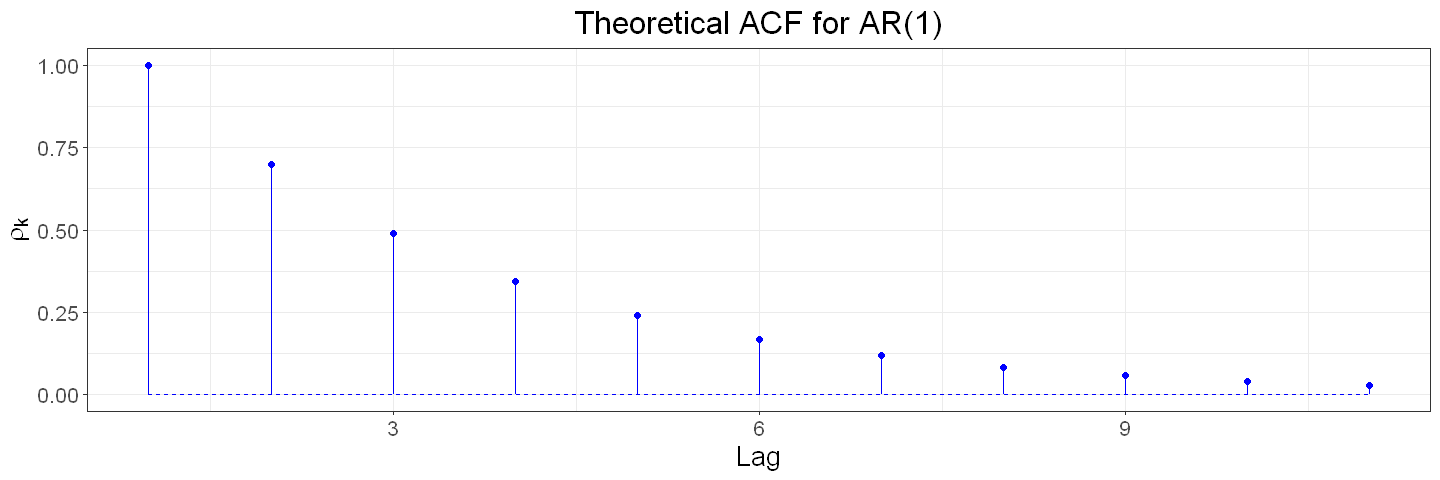

In [25]:
plot_acf(ARMAacf(ar=0.7, lag.max=10), title='Theoretical ACF for AR(1)')

**(b)**

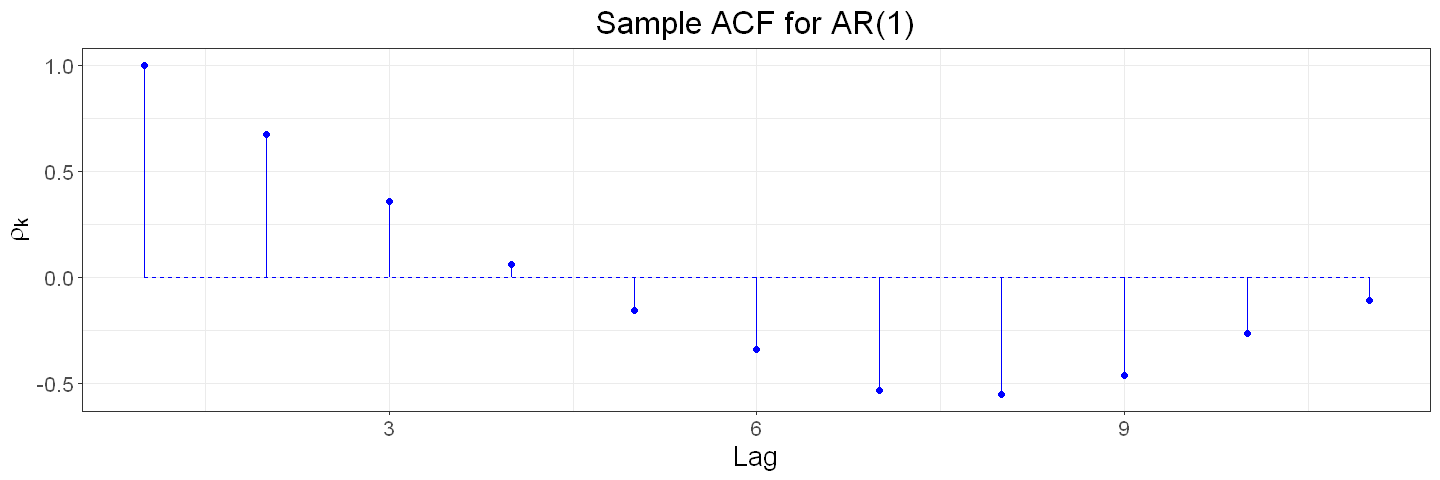

In [26]:
plot_acf(acf(Y, lag.max=10, plot=F)$acf, title='Sample ACF for AR(1)')

The sample ACF are still fairly noisy, though it is a good fit at lower lags.

**(c)**  For the AR(1) model, $\phi_{11} = \phi = 0.7$ and $\phi_{kk} = 0$ for $k > 1$.

**(d)**  See (b).  The estimated standard deviation is 

$$ \sqrt{\text{Var}[r_k] / n} \approx \sqrt{\frac{1}{n}\left[\frac{(1 + \phi^2)(1 - \phi^{2k})}{1 - \phi^2} - 2k\phi^{2k} \right]} $$

In [27]:
plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

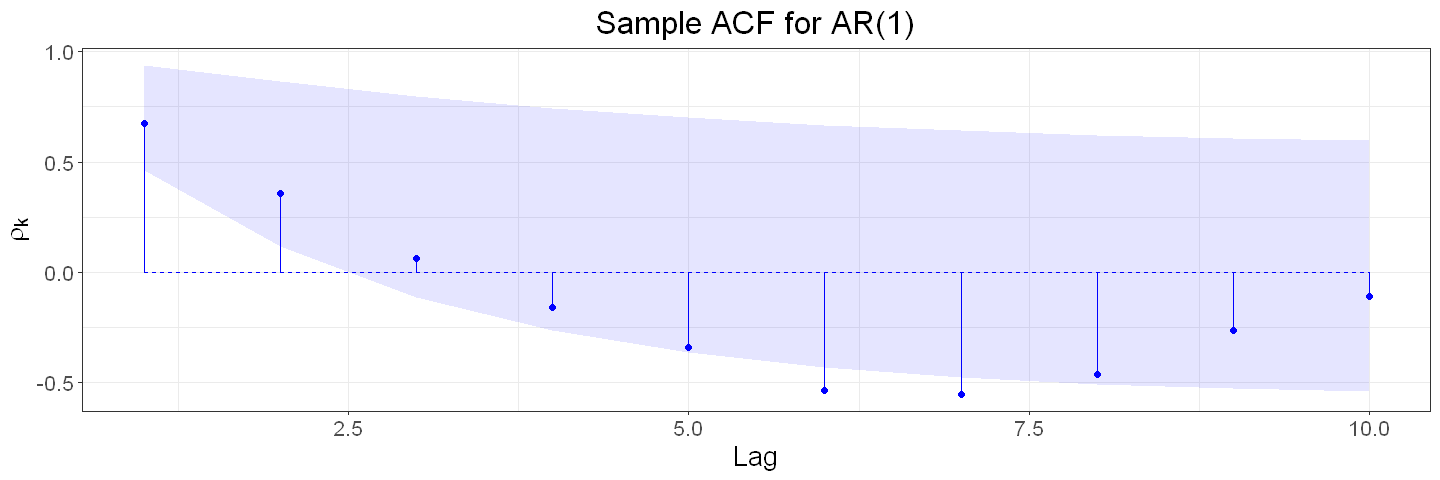

In [28]:
a = acf(Y, lag.max=10, plot=F)$acf[2:11]
rho = (0.7)**(1:10)
se = sapply(1:10, function(k) { se_ar1(0.7, k, 36) })
plot_acf_with_bounds(a, rho - 2 * se, rho + 2 * se, title='Sample ACF for AR(1)')

**(e)**

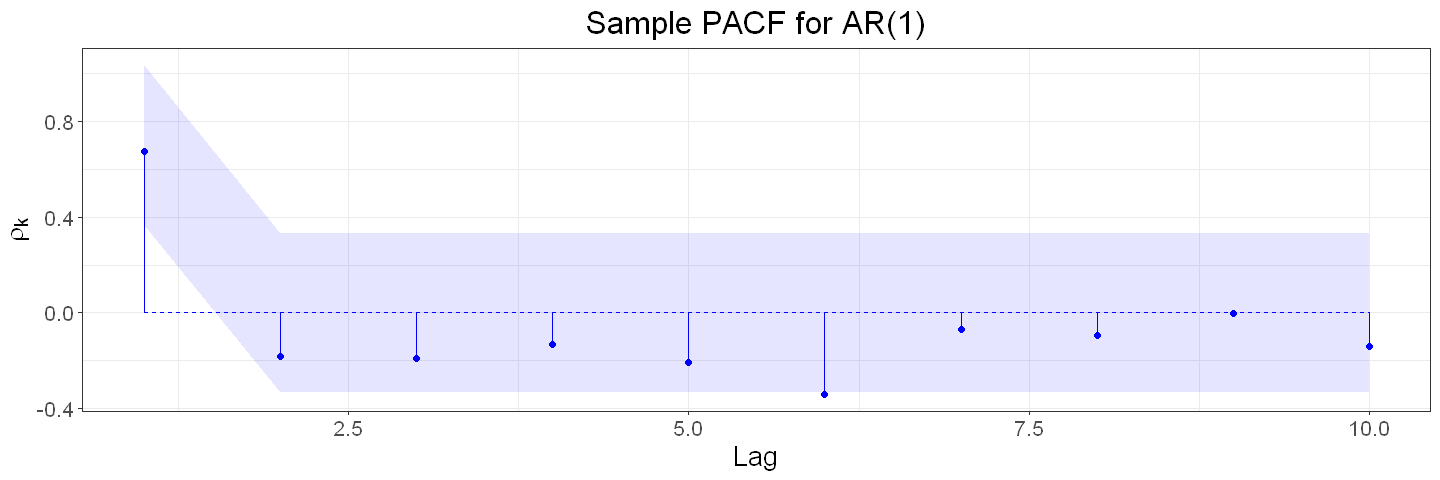

In [29]:
a = pacf(Y, lag.max=10, plot=F)$acf[1:10]
rho = c(0.7, rep(0, 9))
se = 1 / sqrt(36)
plot_acf_with_bounds(a, rho - 2 * se, rho + 2 * se, title='Sample PACF for AR(1)')

The estimated values seem to suggest an AR(1) model.

**Exercise 6.26**.  Simulate an MA(1) time series of length $n = 48$ with $\theta = 0.5$.

**(a)** What are the theoretical autocorrelations for this model?

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** Calculate and plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (Hint: See Equation (6.2.6) on page 114.)

**(d)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)?

**Solution**.

In [30]:
set.seed(0)
Y = arima.sim(model=list(ma=-0.5), n=48)

**(a)**  The theoretical autocorrelations for the MA(1) process are $\rho_1 = -\theta / (1 + \theta^2) = -0.4$ and $\rho_k = 0$ for $k > 1$.

**(b)**

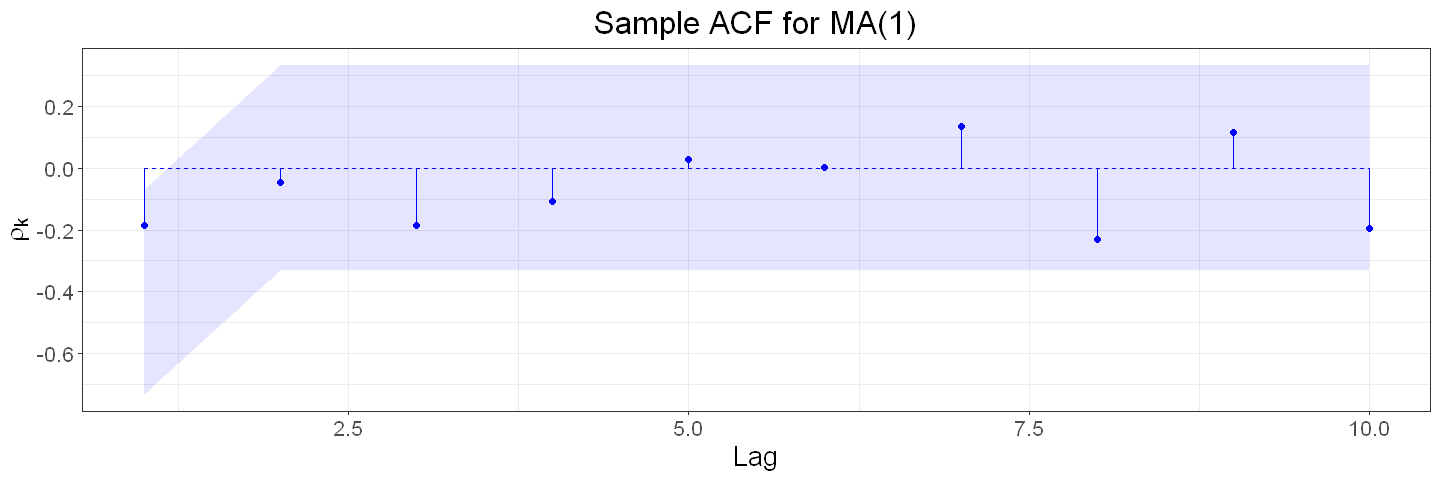

In [31]:
a = acf(Y, lag.max=10, plot=F)$acf[2:11]
rho = c(-0.4, rep(0, 9))
se = sapply(1:10, function(k) { se_ma1(0.5, k, 48) })
plot_acf_with_bounds(a, rho - 2 * se, rho + 2 * se, title='Sample ACF for MA(1)')

**(c)**  Equation (6.2.6) provides the formula for the PACF of the MA(1) process as

$$ \phi_{kk} = -\frac{\theta^k (1 - \theta^2)}{1 - \theta^{2(k+1)}} $$

In [32]:
theoretical_pacf_ma1 <- function(theta, k){ -theta**k * (1 - theta**2) / (1 - theta**(2*(k+1))) }

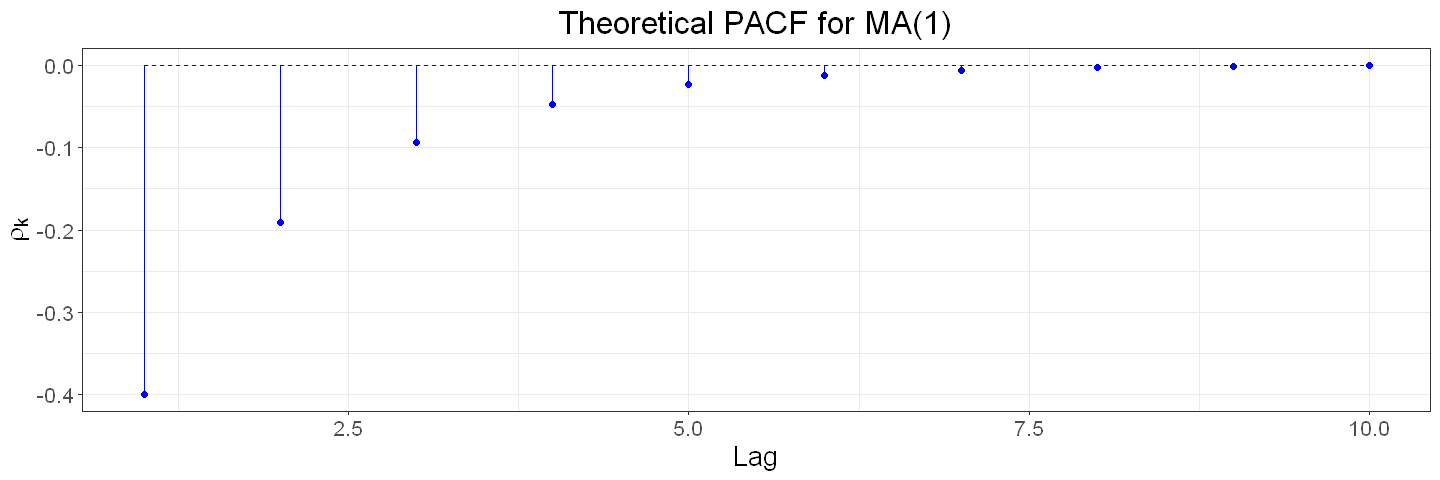

In [33]:
plot_acf(sapply(1:10, function(k) {theoretical_pacf_ma1(0.5, k)}), title='Theoretical PACF for MA(1)')

**(d)**

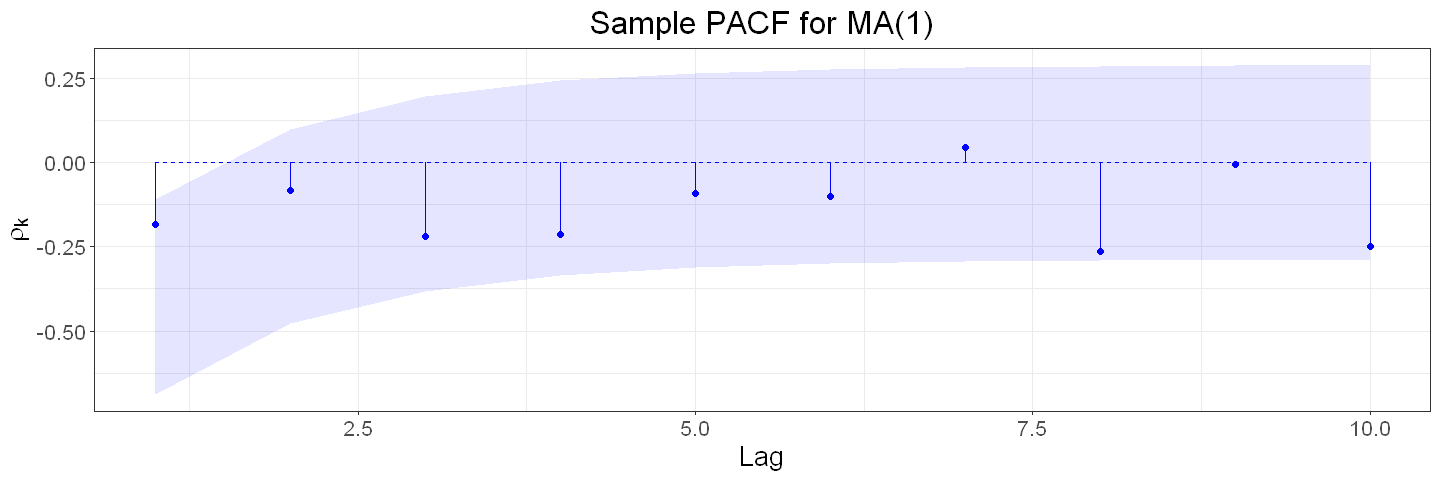

In [34]:
phi_hat = pacf(Y, lag.max=10, plot=F)$acf[1:10]
phi_kk = sapply(1:10, function(k) {theoretical_pacf_ma1(0.5, k)})
se = 1 / sqrt(48)
plot_acf_with_bounds(phi_hat, phi_kk - 2 * se, phi_kk + 2 * se, title='Sample PACF for MA(1)')

While the series is noisy, all values fall within 2 standard deviations from the theoretical values for the PACF.

**Exercise 6.27**.  Simulate an AR(2) time series of length $n = 72$ with $\phi_1 = 0.7$ and $\phi_2 = −0.4$.

**(a)** Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the correlations are negligible.

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** What are the theoretical partial autocorrelations for this model?

**(d)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(e)** Calculate and plot the sample PACF for your simulated series. How well do the values and patterns match the theoretical PACF from part (c)?

**Solution**.

In [35]:
set.seed(0)
Y = arima.sim(model=list(ar=c(0.7, -0.4)), n=72)

**(a)**

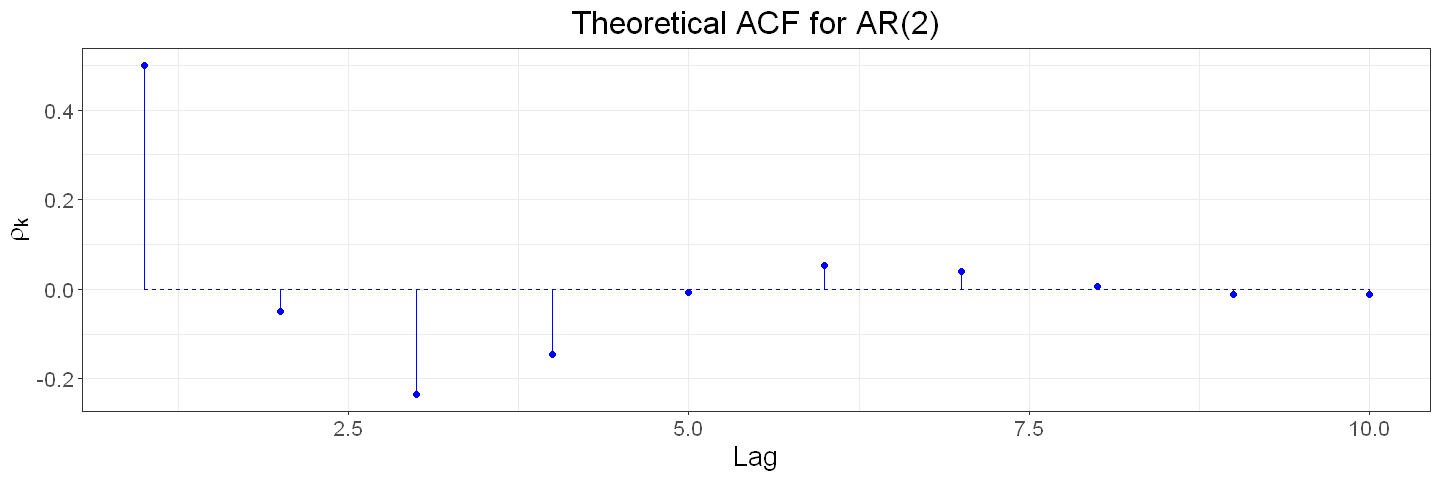

In [36]:
t = ARMAacf(ar=c(0.7, -0.4), lag.max=11)[2:11]
plot_acf(t, title='Theoretical ACF for AR(2)')

**(b)**

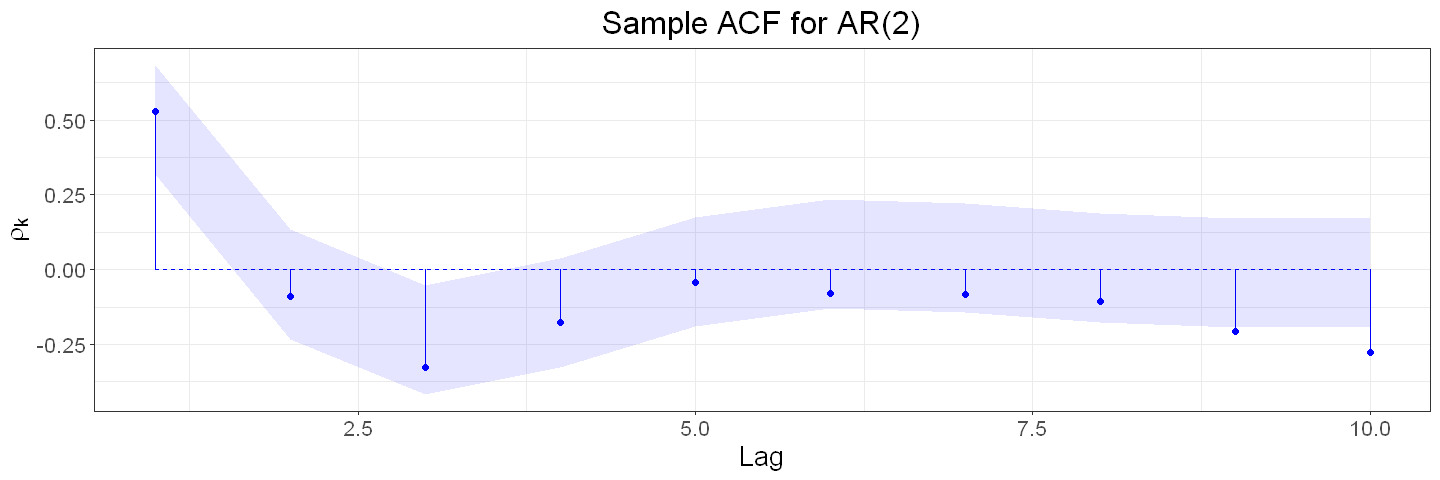

In [37]:
r = acf(Y, lag.max=10, plot=F)$acf[-1]
se = 1 / sqrt(n)

plot_acf_with_bounds(r, t - 2 * se, t + 2*se, title='Sample ACF for AR(2)')

**(c)**  $\phi_{11} = 0.5$, $\phi_{22} = -0.4$, and $\phi_{kk} = 0$ for $k > 2$.

**(d)**  See (b).

**(e)**

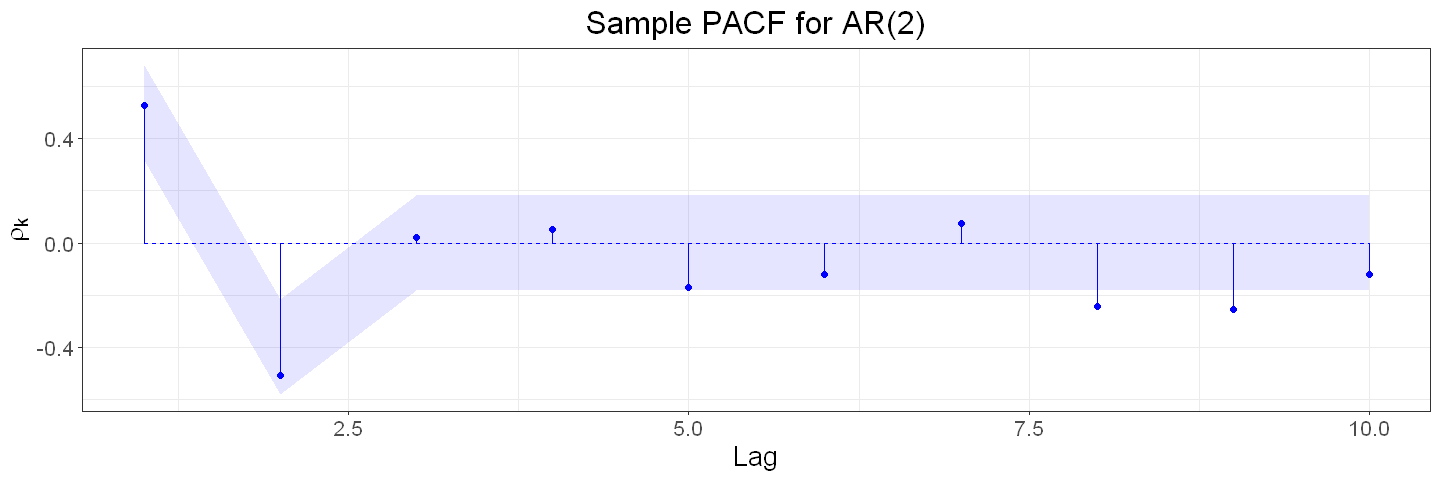

In [38]:
a = pacf(Y, lag.max=10, plot=F)$acf
t = c(0.5, -0.4, rep(0, 8))
se = 1 / sqrt(n)

plot_acf_with_bounds(a, t - 2 * se, t + 2 * se, title='Sample PACF for AR(2)')

It's a very good match to the theoretical values.

**Exercise 6.28**. Simulate an MA(2) time series of length $n = 36$ with $\theta_1 = 0.7$ and $\theta2 = −0.4$.

**(a)** What are the theoretical autocorrelations for this model?

**(b)** Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

**(c)** Plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (We do not have a formula for this PACF. Instead, perform a very large sample simulation, say n = 1000, for
this model and calculate and plot the sample PACF for this simulation.)

**(d)** Calculate and plot the sample PACF for your simulated series of part (a). How well do the values and patterns match the “theoretical” PACF from part (c)?